# Previsão do Valor do Fechamento Ajustado Para Ações

Nanodegree Engenheiro de Machine Learning

Projeto final
Thiago Henrique Martins de Souza


________________________________________________________________________________________________

Base de dados bolsa de valores

Yahoo! Finanças
PETR4.SA

Dados históricos - Período 01/01/2013 até 31/12/2017
Arquivo: petr4-treinamento.csv

Dados históricos - Período 01/01/2018 até 31/01/2018
Arquivo: petr4-teste.csv

_________________________________________________________________________________

- Importação das libs necessárias

- Importação do csv para treinamento

- normalização dos dados

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Carrega CSV
base = pd.read_csv('petr4-treinamento.csv')

#Remove valores nan
base = base.dropna()

#Imprime dados
base.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,19.990000,20.209999,19.690001,19.690001,18.086271,30182600.0
1,2013-01-03,19.809999,20.400000,19.700001,20.400000,18.738441,30552600.0
2,2013-01-04,20.330000,20.620001,20.170000,20.430000,18.766001,36141000.0
3,2013-01-07,20.480000,20.670000,19.950001,20.080000,18.444506,28069600.0
4,2013-01-08,20.110001,20.230000,19.459999,19.500000,17.911745,29091300.0


In [7]:
#Separação do valor Adj Close para previsões
base_treinamento = base.iloc[:, 5:6].values

#Imprime dados
base_treinamento


array([[18.086271],
       [18.738441],
       [18.766001],
       ...,
       [16.017963],
       [16.067865],
       [16.067865]])

In [8]:
#Normalização dos dados
normalizador = MinMaxScaler()
base_treinam_norm = normalizador.fit_transform(base_treinamento)

#Imprime dados normalizados
base_treinam_norm

array([[0.6838135 ],
       [0.71590949],
       [0.71726583],
       ...,
       [0.58202349],
       [0.58447937],
       [0.58447937]])

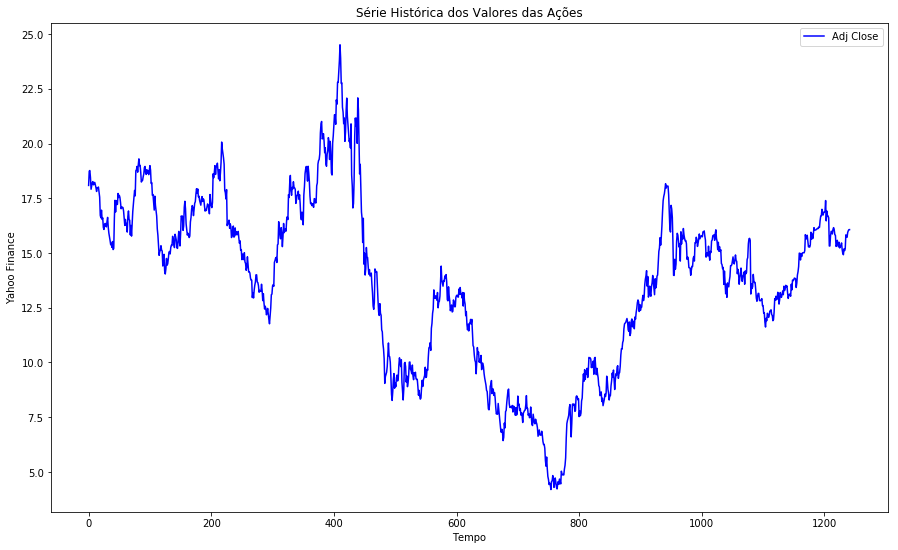

Populating the interactive namespace from numpy and matplotlib


In [10]:
plt.plot(base_treinamento, color='blue', label='Adj Close')
plt.title('Série Histórica dos Valores das Ações')
plt.xlabel('Tempo')
plt.ylabel('Yahoo Finance')
plt.legend()
plt.show()

%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)
 


_____________________________________________

- Estrutura da base de dados para previsão temporal

- Definição do intervalo de tempo

- Valores reais

In [11]:
previsores = []
preco_real = []

#Previsores com intervalo de tempo de 90 dias menores para previsão dos valores e preço real para comparação
for i in range(90, len(base_treinam_norm)):
    previsores.append(base_treinam_norm[i-90:i, 0])
    preco_real.append(base_treinam_norm[i, 0]) 

#Transformação do array em Numpy Array
previsores, preco_real =  np.array(previsores), np.array(preco_real)

In [12]:
#Alteração das dimensões para utilização do Keras
previsores = np.reshape(previsores, (previsores.shape[0], previsores.shape[1], 1))

#imprime os dados
previsores

array([[[0.6838135 ],
        [0.71590949],
        [0.71726583],
        ...,
        [0.69424286],
        [0.6951641 ],
        [0.7034554 ]],

       [[0.71590949],
        [0.71726583],
        [0.70144373],
        ...,
        [0.6951641 ],
        [0.7034554 ],
        [0.70990428]],

       [[0.71726583],
        [0.70144373],
        [0.67522435],
        ...,
        [0.7034554 ],
        [0.70990428],
        [0.72418376]],

       ...,

       [[0.46954811],
        [0.47151274],
        [0.47544204],
        ...,
        [0.56728878],
        [0.56728878],
        [0.57809433]],

       [[0.47151274],
        [0.47544204],
        [0.47495089],
        ...,
        [0.56728878],
        [0.57809433],
        [0.58202349]],

       [[0.47544204],
        [0.47495089],
        [0.47396857],
        ...,
        [0.57809433],
        [0.58202349],
        [0.58447937]]])

_______________________________

- Estrutura da rede neural recorrente (RNN) - Long Short Term Memory (LSTM)

- Criação do regressor e camadas utilizadas

- Treinamento


# Regressor 1

- 50 unidades de memória na primeira camada e 30 unidades de memória nas camadas restantes


In [220]:
#Regressor 1
regressor1 = Sequential()

#Camada 1 - 50 células de memória
regressor1.add(LSTM(units=50, return_sequences=True, input_shape=(previsores.shape[1], 1)))
#Prevenção de overfitting
regressor1.add(Dropout(0.3))

#Camada 2 - 30 células de memória
regressor1.add(LSTM(units=30, return_sequences=True))
regressor1.add(Dropout(0.3))

#Camada 3 - 30 células de memória
regressor1.add(LSTM(units=30, return_sequences=True))
regressor1.add(Dropout(0.3))

#Camada 4 - 30 células de memória
regressor1.add(LSTM(units=30))
regressor1.add(Dropout(0.3))

#Camada densa com ativação linear
regressor1.add(Dense(units=1, activation='linear'))

#Compilação do regressor, otimização RMSProp, cãlculo de erro mean_squared_error e métricas mean_absolute_error
regressor1.compile(optimizer='rmsprop', loss='mean_squared_error', metrics=['mean_absolute_error'])

#Fit com 100 épocas 
regressor1.fit(previsores, preco_real, epochs=100, batch_size=32)

Epoch 1/100
1152/1152 [==============================] - 56s 49ms/step - loss: 0.0329 - mean_absolute_error: 0.1321
Epoch 2/100
1152/1152 [==============================] - 43s 37ms/step - loss: 0.0163 - mean_absolute_error: 0.0999
Epoch 3/100
1152/1152 [==============================] - 43s 37ms/step - loss: 0.0129 - mean_absolute_error: 0.0884
Epoch 4/100
1152/1152 [==============================] - 45s 39ms/step - loss: 0.0123 - mean_absolute_error: 0.0856
Epoch 5/100
1152/1152 [==============================] - 46s 40ms/step - loss: 0.0106 - mean_absolute_error: 0.0804
Epoch 6/100
1152/1152 [==============================] - 44s 38ms/step - loss: 0.0096 - mean_absolute_error: 0.0758
Epoch 7/100
1152/1152 [==============================] - 43s 37ms/step - loss: 0.0098 - mean_absolute_error: 0.0752
Epoch 8/100
1152/1152 [==============================] - 44s 39ms/step - loss: 0.0088 - mean_absolute_error: 0.0716
Epoch 9/100
1152/1152 [==============================] - 46s 40ms/step -

1152/1152 [==============================] - 49s 42ms/step - loss: 0.0020 - mean_absolute_error: 0.0331
Epoch 72/100
1152/1152 [==============================] - 40s 35ms/step - loss: 0.0019 - mean_absolute_error: 0.0334
Epoch 73/100
1152/1152 [==============================] - 46s 40ms/step - loss: 0.0019 - mean_absolute_error: 0.0330
Epoch 74/100
1152/1152 [==============================] - 40s 34ms/step - loss: 0.0020 - mean_absolute_error: 0.0336
Epoch 75/100
1152/1152 [==============================] - 43s 37ms/step - loss: 0.0020 - mean_absolute_error: 0.0335
Epoch 76/100
1152/1152 [==============================] - 42s 37ms/step - loss: 0.0018 - mean_absolute_error: 0.0317
Epoch 77/100
1152/1152 [==============================] - 42s 37ms/step - loss: 0.0019 - mean_absolute_error: 0.0330
Epoch 78/100
1152/1152 [==============================] - 42s 36ms/step - loss: 0.0019 - mean_absolute_error: 0.0319
Epoch 79/100
1152/1152 [==============================] - 42s 37ms/step - los

# Regressor 2 

- 100 unidades de memória na primeira camada e 50 unidades de memória nas camadas restantes

In [25]:
#Regressor 2
regressor = Sequential()

#Camada 1 - 100 células de memória
regressor.add(LSTM(units=100, return_sequences=True, input_shape=(previsores.shape[1], 1)))
#Prevenção de overfitting
regressor.add(Dropout(0.3))

#Camada 2 - 50 células de memória
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.3))

#Camada 3 - 50 células de memória
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.3))

#Camada 4 - 50 células de memória
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.3))

#Camada densa com ativação linear
regressor.add(Dense(units=1, activation='linear'))

#Compilação do regressor, otimização RMSProp, cãlculo de erro mean_squared_error e métricas mean_absolute_error
regressor.compile(optimizer='rmsprop', loss='mean_squared_error', metrics=['mean_absolute_error'])

#Fit com 100 épocas 
regressor.fit(previsores, preco_real, epochs=100, batch_size=32)

Epoch 1/100
1152/1152 [==============================] - 56s 48ms/step - loss: 0.0409 - mean_absolute_error: 0.1443
Epoch 2/100
1152/1152 [==============================] - 47s 41ms/step - loss: 0.0135 - mean_absolute_error: 0.0916
Epoch 3/100
1152/1152 [==============================] - 45s 39ms/step - loss: 0.0150 - mean_absolute_error: 0.0937
Epoch 4/100
1152/1152 [==============================] - 45s 39ms/step - loss: 0.0133 - mean_absolute_error: 0.0892
Epoch 5/100
1152/1152 [==============================] - 45s 39ms/step - loss: 0.0115 - mean_absolute_error: 0.0832
Epoch 6/100
1152/1152 [==============================] - 53s 46ms/step - loss: 0.0096 - mean_absolute_error: 0.0771
Epoch 7/100
1152/1152 [==============================] - 47s 41ms/step - loss: 0.0087 - mean_absolute_error: 0.0716
Epoch 8/100
1152/1152 [==============================] - 52s 45ms/step - loss: 0.0076 - mean_absolute_error: 0.0654
Epoch 9/100
1152/1152 [==============================] - 45s 39ms/step -

1152/1152 [==============================] - 46s 40ms/step - loss: 0.0017 - mean_absolute_error: 0.0311
Epoch 72/100
1152/1152 [==============================] - 45s 39ms/step - loss: 0.0016 - mean_absolute_error: 0.0308
Epoch 73/100
1152/1152 [==============================] - 48s 41ms/step - loss: 0.0015 - mean_absolute_error: 0.0301
Epoch 74/100
1152/1152 [==============================] - 50s 44ms/step - loss: 0.0016 - mean_absolute_error: 0.0304
Epoch 75/100
1152/1152 [==============================] - 48s 41ms/step - loss: 0.0015 - mean_absolute_error: 0.0292
Epoch 76/100
1152/1152 [==============================] - 47s 40ms/step - loss: 0.0016 - mean_absolute_error: 0.0297
Epoch 77/100
1152/1152 [==============================] - 45s 39ms/step - loss: 0.0017 - mean_absolute_error: 0.0308
Epoch 78/100
1152/1152 [==============================] - 46s 40ms/step - loss: 0.0016 - mean_absolute_error: 0.0299
Epoch 79/100
1152/1152 [==============================] - 46s 40ms/step - los

- Preparando dados para previsões

In [126]:
# Importação do arquivo de teste
base_teste = pd.read_csv('petr4-teste.csv')
# Serie Temporal
ts = base_teste['Adj Close'];
# Seleciona a coluna Adj. Close
preco_real_teste = base_teste.iloc[:, 5:6].values
# Imprime os valores
preco_real_teste

array([[16.516966],
       [16.666668],
       [16.696608],
       [16.796408],
       [16.99601 ],
       [16.99601 ],
       [16.766466],
       [17.215569],
       [17.265469],
       [17.315371],
       [17.614771],
       [18.323355],
       [18.183632],
       [18.223553],
       [18.433134],
       [18.203592],
       [19.301397],
       [19.301397],
       [19.890221],
       [19.810381],
       [19.451097],
       [19.660681]])

In [127]:
# Concatenação da base completa com a base de teste
base_completa = pd.concat((base['Adj Close'], base_teste['Adj Close']), axis=0)

preco_base = base.iloc[:, 5:6].values
preco_real_completa = np.concatenate((preco_base, preco_real_teste), axis=0)
preco_real_completa

# Imprime base completa
#base_completa


array([[18.086271],
       [18.738441],
       [18.766001],
       ...,
       [19.810381],
       [19.451097],
       [19.660681]])

Populating the interactive namespace from numpy and matplotlib


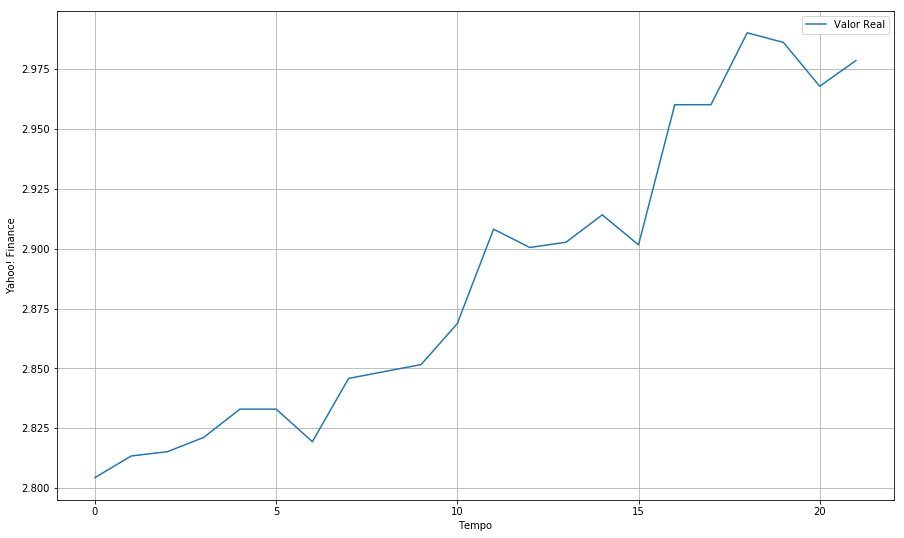

In [191]:
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)


# Preço Real Janeiro de 2018
ts_log = np.log(ts)
plt.plot(ts_log, label='Valor Real')
plt.xlabel('Tempo')
plt.ylabel('Yahoo! Finance')
plt.legend()
plt.grid()

# Média Móvel (Janeiro)

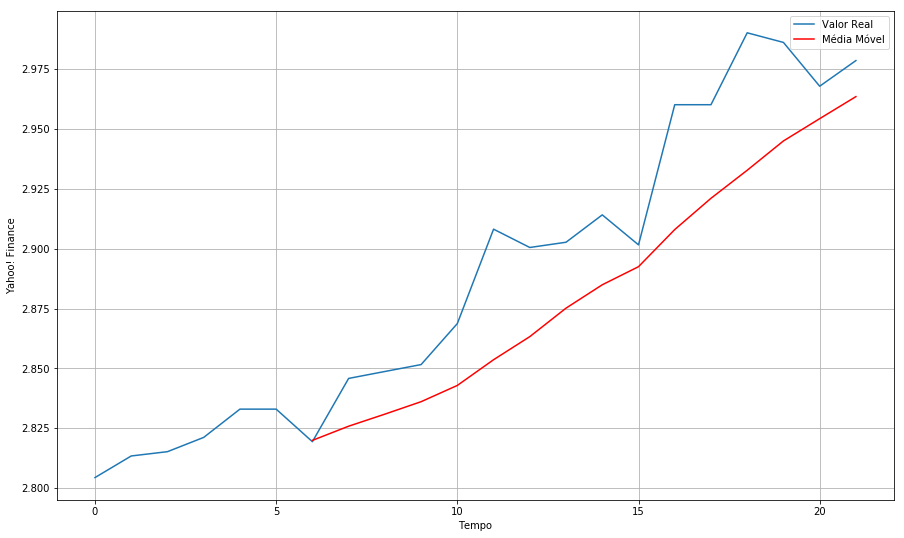

In [193]:
# Média Móvel dos últimos 15 dias de janeiro
moving_avg = ts_log.rolling(7).mean()
plt.plot(ts_log, label='Valor Real')
plt.plot(moving_avg, color='red', label='Média Móvel')
plt.xlabel('Tempo')
plt.ylabel('Yahoo! Finance')
plt.legend()
plt.grid()

# Subtração de Valores NaN

A linha vermelha mostra a média móvel. Iremos subtrair isso da série original.


In [194]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(7)

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
6   -0.000549
Name: Adj Close, dtype: float64

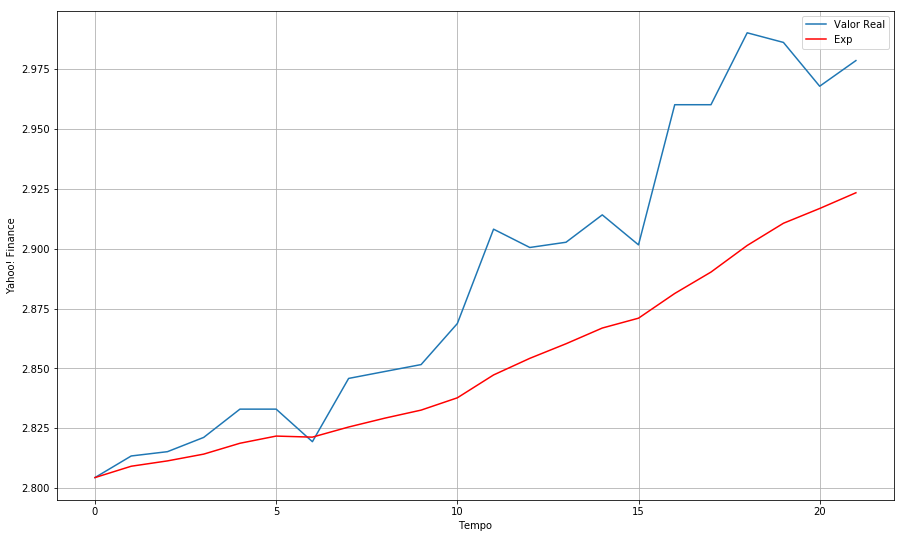

In [196]:
# Exponenciação 
ts_log_moving_avg_diff.dropna(inplace=True)

expwighted_avg = ts_log.ewm(halflife=7).mean()
plt.plot(ts_log, label='Valor Real')
plt.plot(expwighted_avg, color='red', label='Exp')
plt.xlabel('Tempo')
plt.ylabel('Yahoo! Finance')
plt.legend()
plt.grid()

In [197]:
ts_log_ewma_diff = ts_log - expwighted_avg 

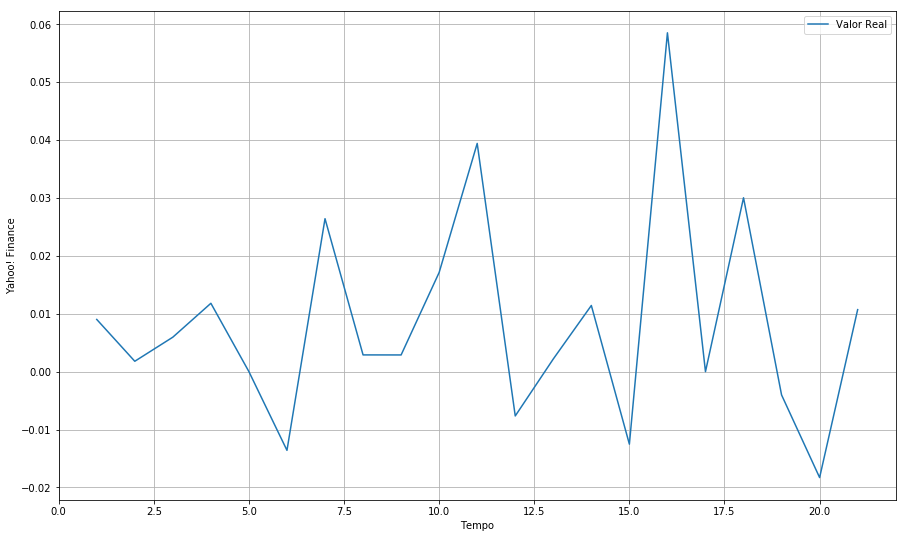

In [198]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff, label='Valor Real')
plt.xlabel('Tempo')
plt.ylabel('Yahoo! Finance')
plt.legend()
plt.grid()

In [199]:
ts_log_diff.dropna(inplace=True)

# Modelo ARIMA

/Users/thiago/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


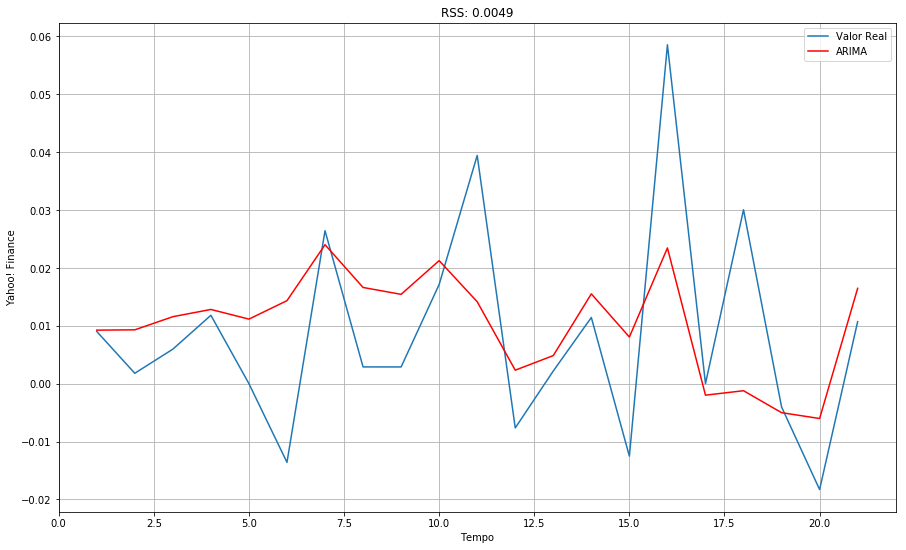

In [200]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(ts_log, order=(2, 1, 2)) 
results_ARIMA = model.fit(disp=-1) 
plt.plot(ts_log_diff, label="Valor Real") 
plt.plot(results_ARIMA.fittedvalues, color='red', label='ARIMA') 
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))
plt.xlabel('Tempo')
plt.ylabel('Yahoo! Finance')
plt.legend()
plt.grid()

# Trazendo de volta à escala original

/Users/thiago/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


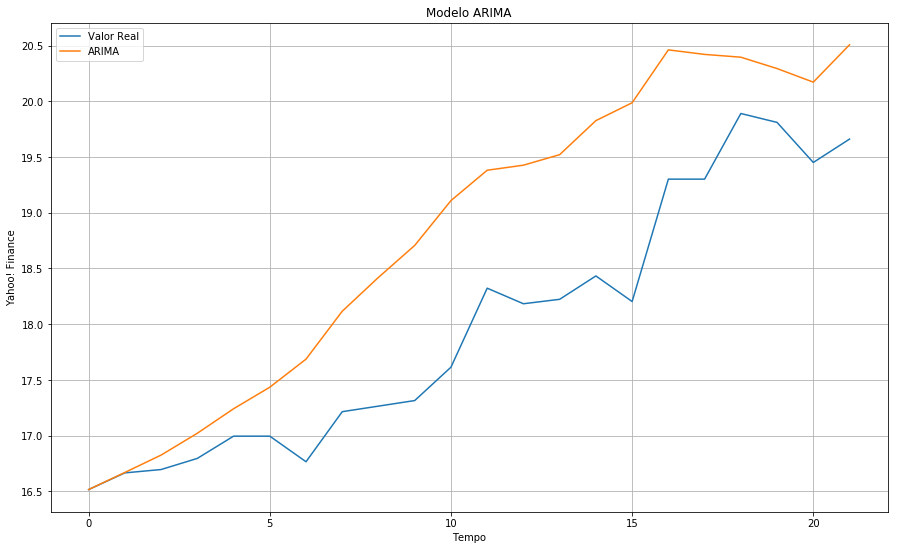

In [201]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True) 
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum() 
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0) 

predictions_ARIMA = np.exp(predictions_ARIMA_log) 
plt.plot(ts, label="Valor Real") 
plt.plot(predictions_ARIMA, label='ARIMA') 
plt.title('Modelo ARIMA')
plt.xlabel('Tempo')
plt.ylabel('Yahoo! Finance')
plt.legend()
plt.grid()

In [245]:
entradas = base_completa[len(base_completa) - len(base_teste) - 90:].values
entradas = entradas.reshape(-1, 1)
# Normaliza os dados
entradas = normalizador.transform(entradas)
# Imprime os dados
entradas

array([[0.47495089],
       [0.47396857],
       [0.45432219],
       [0.46414533],
       [0.48231829],
       [0.48968565],
       [0.50147347],
       [0.53143421],
       [0.53143421],
       [0.51620824],
       [0.52996068],
       [0.5240668 ],
       [0.53192531],
       [0.53241647],
       [0.53241647],
       [0.53241647],
       [0.53732809],
       [0.57318271],
       [0.56335952],
       [0.56434183],
       [0.57170924],
       [0.55795679],
       [0.54567781],
       [0.54715123],
       [0.54518665],
       [0.55009823],
       [0.57858544],
       [0.56286836],
       [0.57465613],
       [0.56434183],
       [0.57416503],
       [0.58889984],
       [0.58349706],
       [0.58349706],
       [0.58349706],
       [0.58546174],
       [0.58595275],
       [0.58742632],
       [0.58693516],
       [0.59037321],
       [0.58939095],
       [0.60461692],
       [0.61493117],
       [0.61542242],
       [0.63015724],
       [0.61787821],
       [0.61738705],
       [0.623

- preparação do teste de previsão

In [246]:
X_teste = []
# Últimos valores das ações de janeiro 2018
for i in range(90, len(entradas)):
    X_teste.append(entradas[i-90:i,0])

# Conversão para Numpy Array    
X_teste = np.array(X_teste)
X_teste = np.reshape(X_teste, (X_teste.shape[0], X_teste.shape[1], 1))
# Imprime os dados
X_teste

array([[[0.47495089],
        [0.47396857],
        [0.45432219],
        ...,
        [0.58202349],
        [0.58447937],
        [0.58447937]],

       [[0.47396857],
        [0.45432219],
        [0.46414533],
        ...,
        [0.58447937],
        [0.58447937],
        [0.6065815 ]],

       [[0.45432219],
        [0.46414533],
        [0.48231829],
        ...,
        [0.58447937],
        [0.6065815 ],
        [0.61394895]],

       ...,

       [[0.56434183],
        [0.57170924],
        [0.55795679],
        ...,
        [0.74361488],
        [0.74361488],
        [0.77259335]],

       [[0.57170924],
        [0.55795679],
        [0.54567781],
        ...,
        [0.74361488],
        [0.77259335],
        [0.76866409]],

       [[0.55795679],
        [0.54567781],
        [0.54715123],
        ...,
        [0.77259335],
        [0.76866409],
        [0.75098224]]])

# Realiza as previsões

In [247]:
# Realiza a previsão Regressor 1 (não otimizado)
previsoes1 = regressor1.predict(X_teste)
# Normaliza os dados
previsoes1 = normalizador.inverse_transform(previsoes1)


# Realiza a previsão Regressor 2 (otimizado)
previsoes = regressor.predict(X_teste)
# Normaliza os dados
previsoes = normalizador.inverse_transform(previsoes)

# Média das previsões

In [248]:
previsoes1.mean()

17.489777

In [249]:
previsoes.mean()

17.930103

# Média dos valores reais

In [250]:
preco_real_teste.mean()

17.983125272727275

# MAE (Mean Absolute Error)

In [251]:
from sklearn.metrics import mean_absolute_error
# MSE Valor Real sobre as Previsões (não otimizada)
mean_absolute_error(preco_real_teste, previsoes1)

0.4948271728265933

In [252]:
# MSE Valor Real sobre as Previsões (otimizada)
mean_absolute_error(preco_real_teste, previsoes)

0.2298753828235973

In [253]:
# MSE Valor Real sobre o modelo ARIMA
mean_absolute_error(predictions_ARIMA, previsoes)

0.8945400589439759

# Gráfico de previsões dos preços de ações para Janeiro de 2018 

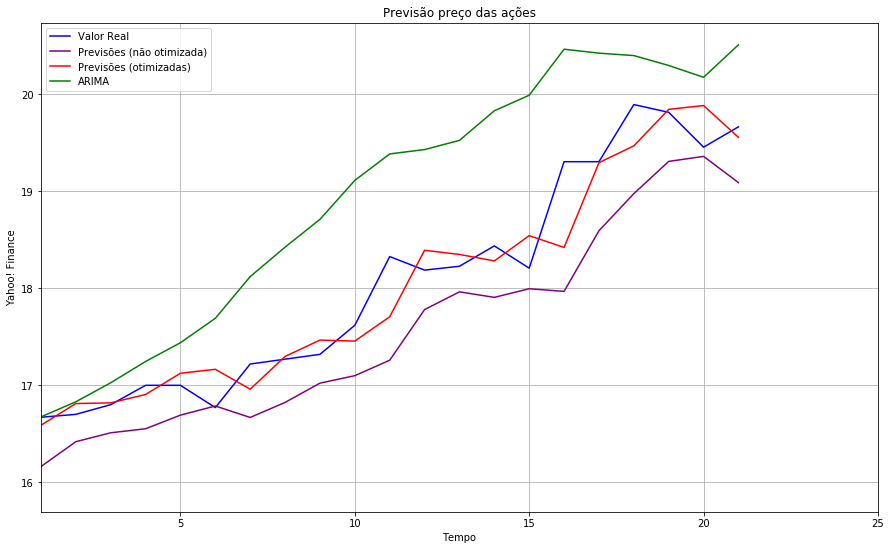

In [254]:
plt.plot(preco_real_teste, color='blue', label='Valor Real')
plt.plot(previsoes1, color='purple', label='Previsões (não otimizada)')
plt.plot(previsoes, color='red', label='Previsões (otimizadas)')
plt.plot(predictions_ARIMA, color='green', label='ARIMA')
plt.title('Previsão preço das ações')
plt.xlim(1, 25)
plt.xlabel('Tempo')
plt.ylabel('Yahoo! Finance')
plt.legend()
plt.grid()
plt.show()